# **Project: Loan Predictions**

Contents

1.   Data Information
2.   Goal of the Project
3.   Loading Data
4.   Understanding Data
5.   Exploratory Data Analysis
     *   CountPlot
     *   Distribution Plot
     *   Correlation
5.   Feature Engineering
     *   Handle Missing Values
     *   Log Transformation
     *   Label Encoder
6.   Machine Learning Models
     *  Supervised Learning
        -   Logistic Regresion
        -   Naive Models
        -   KNearest Neighbours
        -   Support Vector Machine
        -   Decision Tree
        -   Random Forest

7.  Results and conclusion
8.  References





# Information about  Data
The description for each variable is shown below.

    Loan_ID → Unique Loan ID

    Gender → Male/ Female

    Married → Applicant married (Y/N)

    Dependents → Number of dependents

    Education → Applicant Education (Graduate/ Under Graduate)

    Self_Employed → Self employed (Y/N)

    ApplicantIncome → Applicant income

    CoapplicantIncome → Coapplicant income

    LoanAmount → Loan amount in thousands

    Loan_Amount_Term → Term of loan in months

    Credit_History → credit history meets guidelines

    Property_Area → Urban/ Semi Urban/ Rural

    Loan_Status → Loan approved (Y/N)


# 2. Goal of the Project

This notebook  is designed to solve binary classification problems, Loan Predictions. In others words, this notebook wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others

# 3.  Loading Data

## 3.1 Import Libraries

In [35]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # Seaborn is a library for making statistical graphics in Python.
%matplotlib inline

## 3.2 Load Data

In [36]:
datatrain = pd.read_csv("Training Dataset.csv")
datatest = pd.read_csv("Test Dataset.csv")

# 4. Understanding Data

In [37]:
# Shape of data
# ==============================================================================
print(f"The shape of training data is: {datatrain.shape}")
print(f"The shape of testing data is: {datatest.shape}")

The shape of training data is: (614, 13)
The shape of testing data is: (367, 12)


In [38]:
# View the first 5  elements of data
# ==============================================================================
datatrain.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [39]:
# Info of data
# ==============================================================================
datatrain.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [40]:
# Knowking the type of data
# ==============================================================================
datatrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [41]:
# Dropping the Column "Loan_ID"
# ==============================================================================
for df  in [datatrain, datatest]:
  df.drop("Loan_ID", axis = 1, inplace= True)

In [42]:
# Type of variables
# ==============================================================================
print("*"*23, "Categorical Variables", "*"*23)
cat_var = datatrain.dtypes[datatrain.dtypes == "object"].index
print(cat_var, len(cat_var))
print("*"*23, "Numerical Variables", "*"*23)
num_var = datatrain.dtypes[datatrain.dtypes != "object"].index
print(num_var, len(num_var))

*********************** Categorical Variables ***********************
Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object') 7
*********************** Numerical Variables ***********************
Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object') 5


In [43]:
# Missing values
# ==============================================================================
datatrain.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

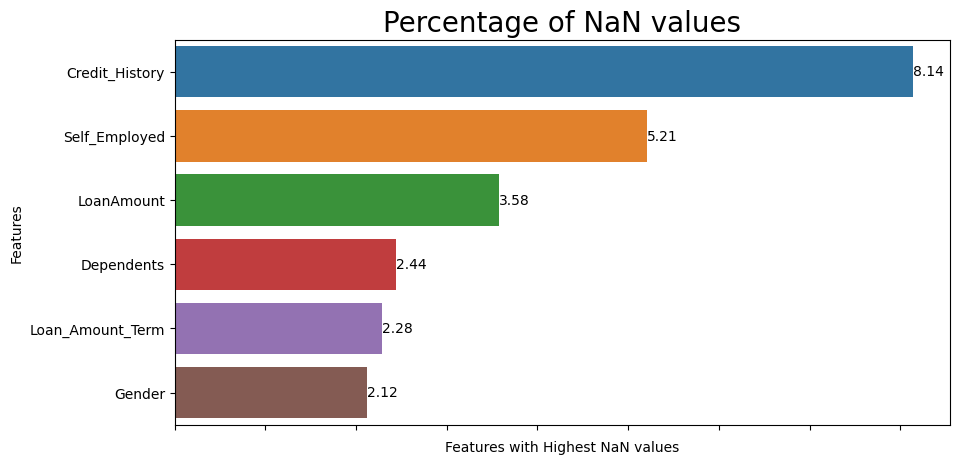

In [44]:
# Percentage of null values
# ==============================================================================
nan_p = []
columns = datatrain.columns
for i in columns:
    prcnt = len(datatrain[i][datatrain[i].isna() == True]) / len(datatrain[i])*100
    nan_p.append(round(prcnt,2))

Nan_values = pd.DataFrame({'Features' : columns, 'NaN_Prcnt': nan_p}).sort_values(by = 'NaN_Prcnt', ascending = False)
Nan_values = Nan_values[Nan_values.NaN_Prcnt > 1]



fig , ax = plt.subplots(figsize=(10, 5))
plt.title('Percentage of NaN values', size = 20)

sns.barplot(x = Nan_values.NaN_Prcnt, y = Nan_values.Features)
plt.xlabel("Features with Highest NaN values")
#to create label on the graphs
ax.set(xticklabels=[])
for i in ax.containers:
    ax.bar_label(i) #bar label
plt.show()

Summary of Data Preprocesing
*   We have dropped the column "Loan_ID".
*   The datatrain contains 614 observations and 12 variables.
*   The datatrain contains 5 numerical variables, whose names are ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']
*   The datatrain contains 7 categorical variables, whose names are ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
*  For this notebook, our output will be `Loan Status`
*   The data contains some null values.




# 5. Exploratory Data Analisis

## Univariate Analysis

It is the simplest form of analyzing data where we examine each variable individually.

*   For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular variable.
*   For numerical features, probability density plots can be used to look at the distribution of the variable.

###  Count plot



********************** Gender **********************
0    81.76
1    18.24
Name: Gender, dtype: float64
********************** Married **********************
0    65.31
1    34.69
Name: Married, dtype: float64
********************** Dependents **********************
0    58.63
1    16.61
2    16.45
3     8.31
Name: Dependents, dtype: float64
********************** Education **********************
1    78.18
0    21.82
Name: Education, dtype: float64
********************** Self_Employed **********************
1    86.64
0    13.36
Name: Self_Employed, dtype: float64
********************** Property_Area **********************
1    37.95
2    32.90
0    29.15
Name: Property_Area, dtype: float64
********************** Loan_Status **********************
1    68.73
0    31.27
Name: Loan_Status, dtype: float64


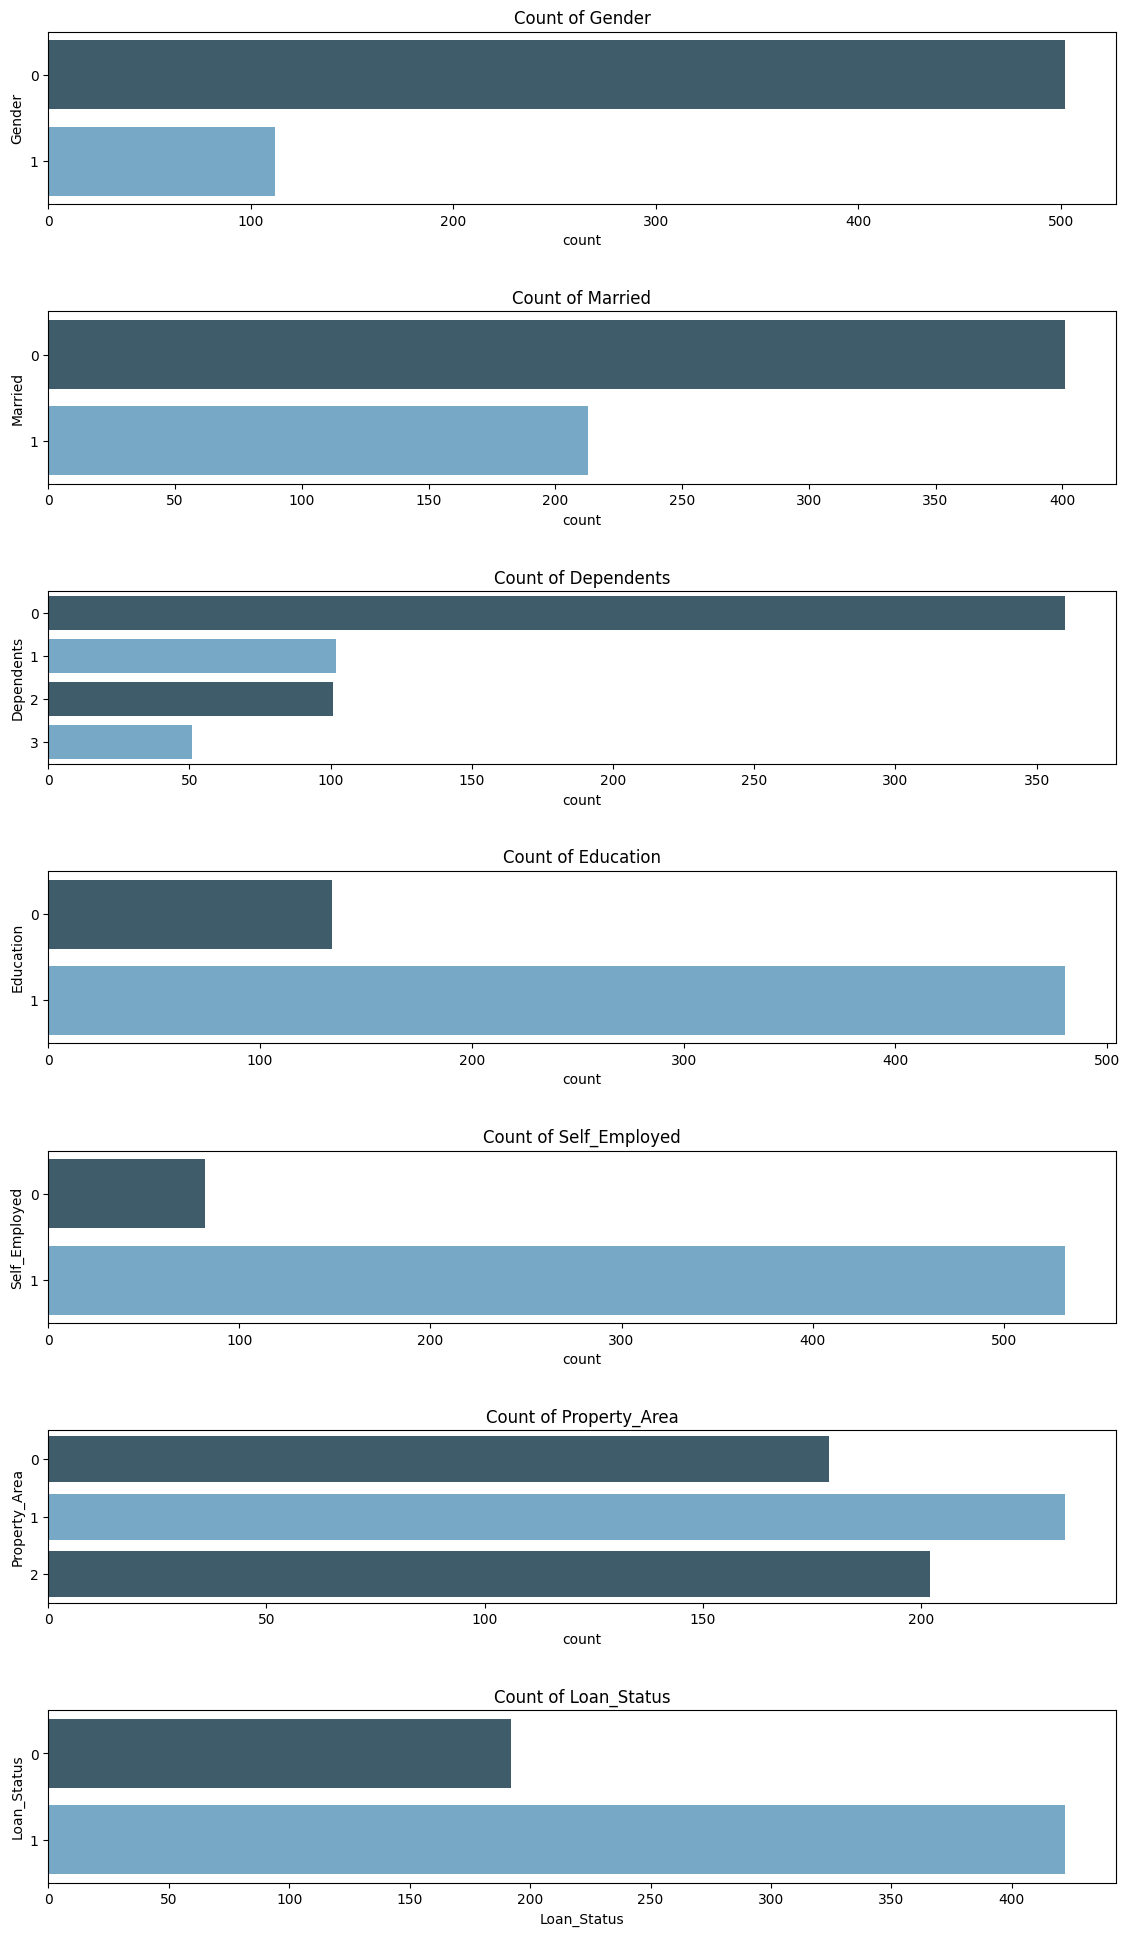

In [175]:
for i in cat_var:
  print("*"*22,i , "*"*22)
  print(round(datatrain[i].value_counts(normalize = True)*100,2))

fig,axes = plt.subplots(7,1,figsize=(12,20))
for idx, i in enumerate(cat_var):
  fig.tight_layout(pad=3.0)
  sns.countplot(y = i, data = datatrain, ax=axes[idx], palette = ["#385E72","#6AABD2"]).set(title=f'Count of {i}')
  plt.xlabel(str(i))



### Distribution plot

********************** ApplicantIncome **********************
It has a skew -0.79 and a Kurtosis 8.37
********************** CoapplicantIncome **********************
It has a skew -0.22 and a Kurtosis -1.96
********************** LoanAmount **********************
It has a skew -1.78 and a Kurtosis 11.14
********************** Loan_Amount_Term **********************
It has a skew -2.4 and a Kurtosis 6.92
********************** Credit_History **********************
It has a skew -2.02 and a Kurtosis 2.1


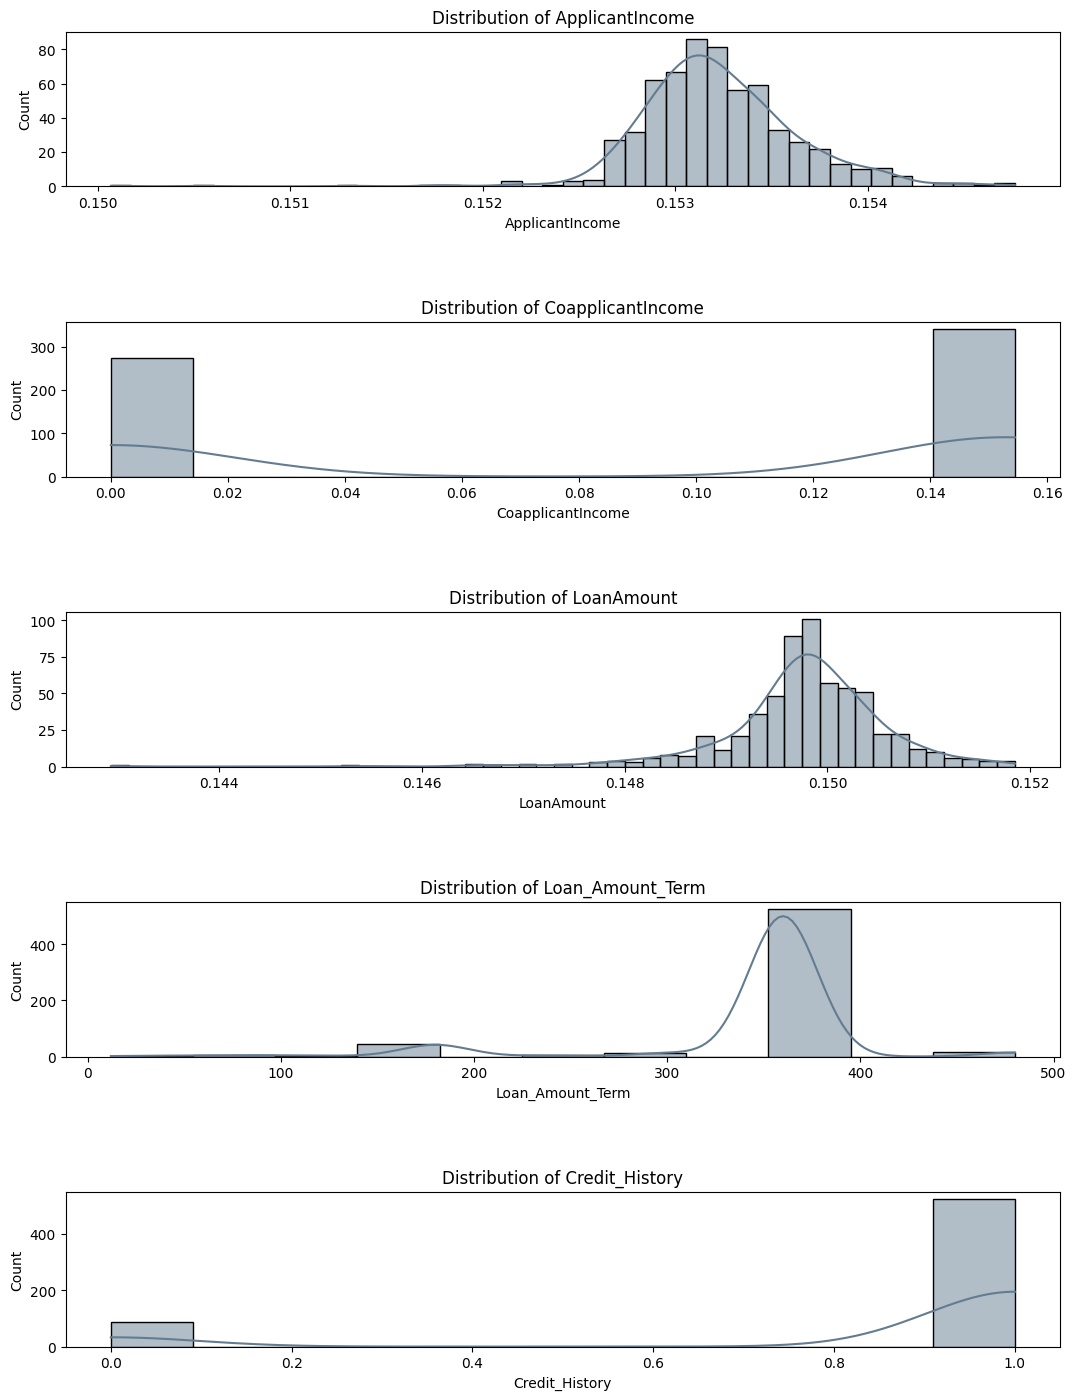

In [173]:
# Skew and Kurtosi of the numerical variable
# ==============================================================================
for i in num_var:
  skew = datatrain[i].skew()
  kurt = datatrain[i].kurt()
  print("*"*22,i ,"*"*22)
  print(f"It has a skew {round(skew,2)} and a Kurtosis {round(kurt,2)}")
# Distribution plot
# ==============================================================================
fig, axes = plt.subplots(5,1,figsize = (12,15))
for idx, i in enumerate(num_var):
  fig.tight_layout(pad=5.0)
  sns.histplot(datatrain[i], kde = True, color = "#647C90", ax = axes[idx]).set(title = f"Distribution of {i}")

  We can be inferred from the above distribution plot that some of them are not normally distributed. We will try to become them to normal distribution in later sections in order to that our machine learning models performs  better.

# 6. Feature Engineering

## Handle  Missing Values

We will treat the missing values by considering the following:
   
    For numerical variables: imputation using mean or median

    For categorical variables: imputation using mode

### Treatment of Categorical  Missing Values

In [47]:
# Categorical case
# ==============================================================================
for df in [datatrain, datatest]:
  for i in cat_var[0:-1]:
    df[i].fillna(df[i].mode()[0],inplace=True)


### Treatment of Numerical Missing Values

In [48]:
# Numerical case
# ==============================================================================
for df in [datatrain, datatest]:
  for i in num_var:
    df[i].fillna(df[i].median(),inplace=True)

In [49]:
# Checking the Null Values
# ==============================================================================
print("*"*19,"Null Values for Training Data", "*"*19)
print(datatrain.isnull().sum())
print("*"*20,"Null Values for Testing Data", "*"*20)
print(datatest.isnull().sum())

******************* Null Values for Training Data *******************
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
******************** Null Values for Testing Data ********************
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


## Log Transformation

One way to become a distribution plot into a normal distribution is to perform a log transformation. By taking the log transformation reduces the larger values, but  it does not affect the smaller values.



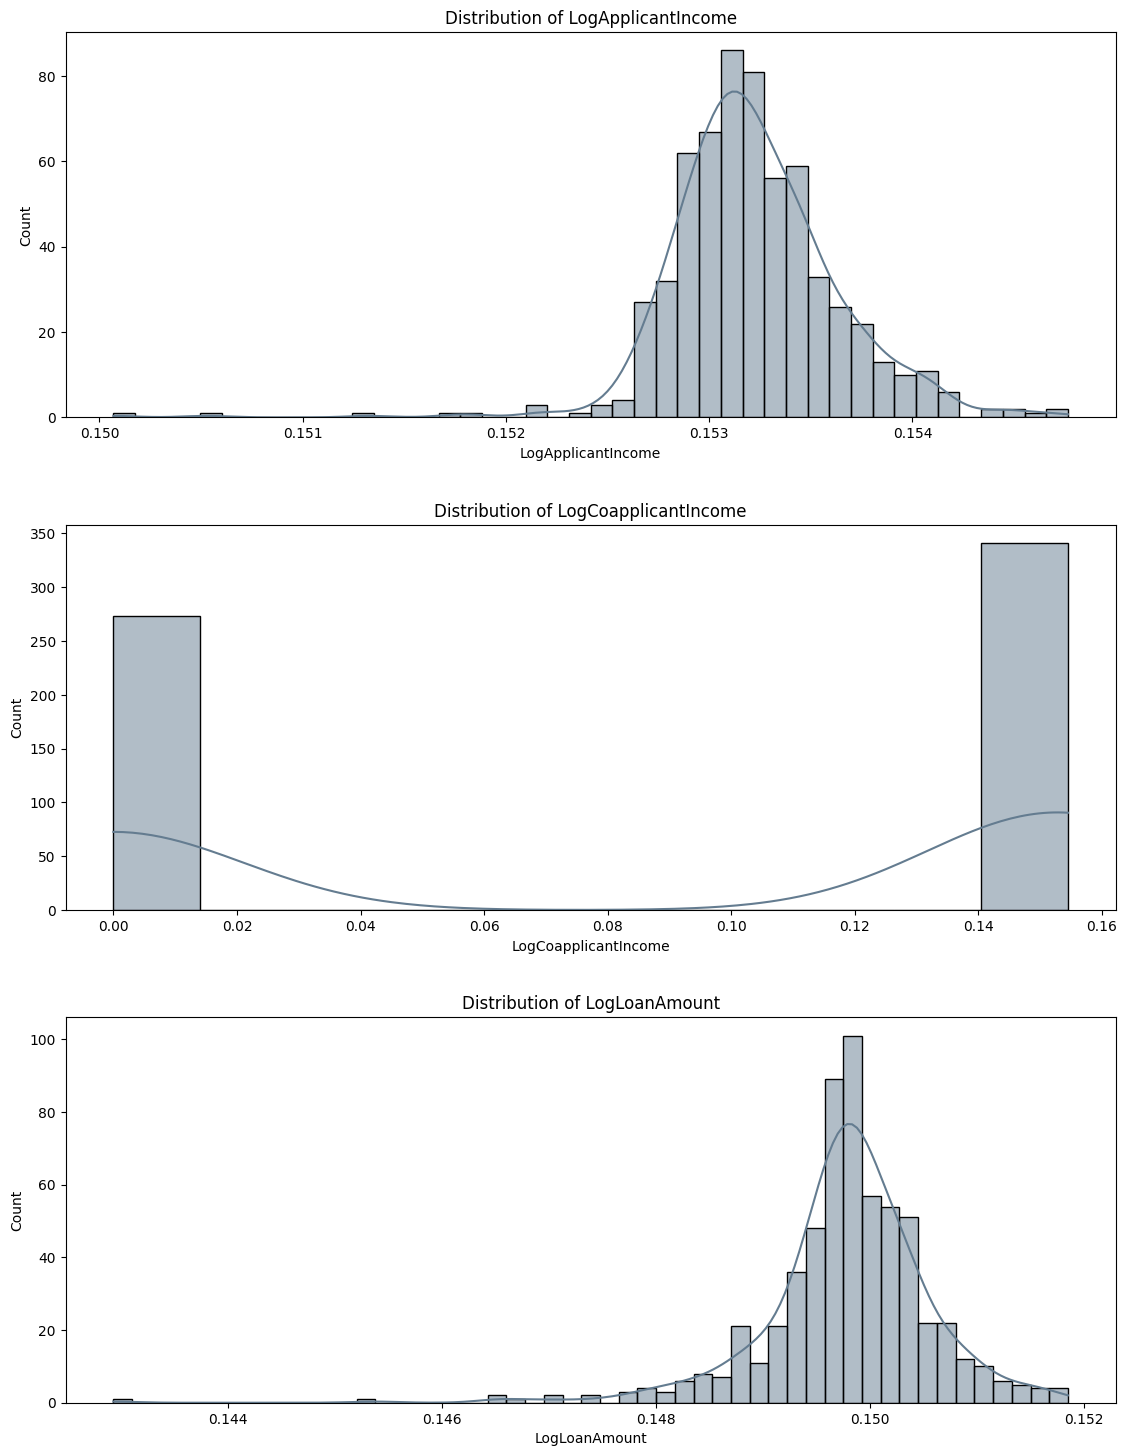

In [172]:
# Taking the Log
# ==============================================================================
Log = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]
for df in [datatrain, datatest]:
  for i in Log:
    df[i] = np.log(df[i]+1)

fig, ax = plt.subplots(3,1, figsize=(12,15))
for idx, i in enumerate(Log):
  fig.tight_layout(pad = 3.0)
  sns.histplot(datatrain[i], kde = True, ax = ax[idx], color = "#647C90").set(title = f"Distribution of Log{i}", xlabel = f"Log{i}")


## Label Encoder

In [51]:
Gen = {"Male": 0 ,"Female":1}
Mar = {"Yes": 0 , "No" : 1 }
Dep = {"0": 0 , "1": 1 , "2":2 , "3+" : 3}
Edu = {"Graduate": 1, "Not Graduate" : 0}
SeEm = {"No" : 1, "Yes" : 0 }
PoAr= {"Urban" : 2, "Semiurban" : 1, "Rural" : 0}
for df in [datatrain, datatest]:
  df["Gender"] = df["Gender"].map(Gen)
  df["Married"] = df["Married"].map(Mar)
  df["Dependents"] = df["Dependents"].map(Dep)
  df["Education"] = df["Education"].map(Edu)
  df["Self_Employed"] = df["Self_Employed"].map(SeEm)
  df["Property_Area"] = df["Property_Area"].map(PoAr)


In [52]:
datatrain['Loan_Status'].replace('N', 0,inplace=True)
datatrain['Loan_Status'].replace('Y', 1,inplace=True)

## CorrelationPlot

`Correlation is a statistical measure that expresses the extent to which two variables are linearly related (meaning they change together at a constant rate). Types of Correlation`

*   `Perfect Positive Correlation  1`
*   `High Positive Correlation 0.9`
*   `Low Positive Correlation 0.5 `
*   `No correlation 0`
*   `Low Negative Correlation -0.5`
*   `High Negative Correlation -0.9`
*   `Perfect Negative Correlation -1`

<Axes: >

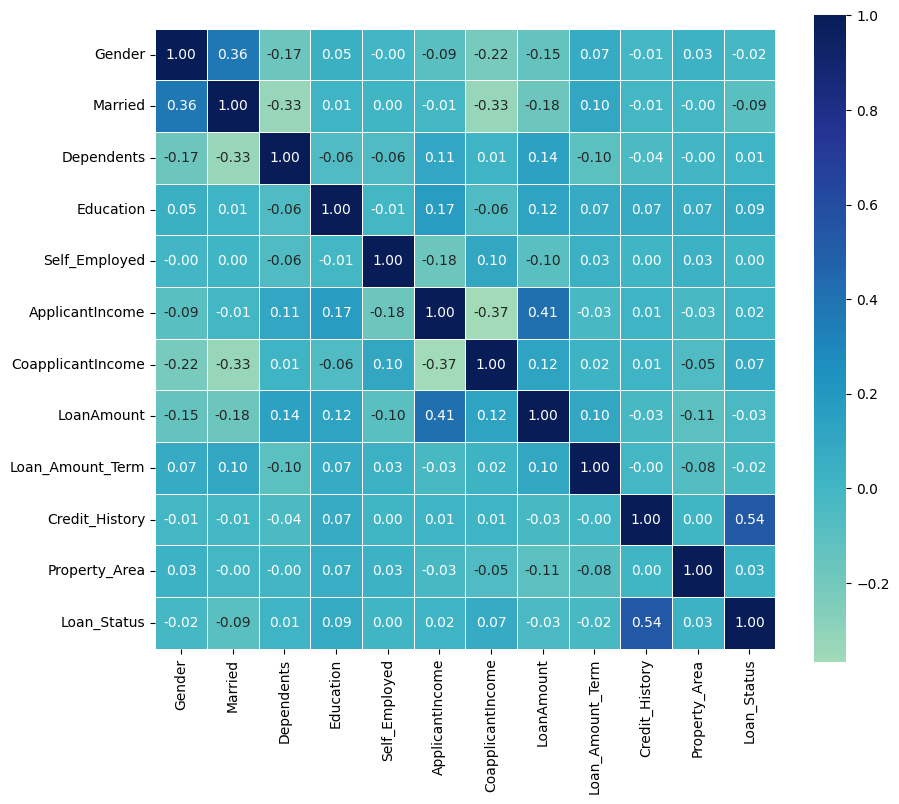

In [181]:
# Graph of correlation between variables
# ==============================================================================
plt.subplots(figsize=(10, 12))
sns.heatmap(datatrain.corr(), vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )

##  Splitting data
The goal of this work is to predict who client can acquire a loan and who can not, so we need to split the data into inputs(independent variable)  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'] and  output(dependent variable) ['Loan_Status']

In [54]:
X = datatrain.drop(["Loan_Status"], axis =1)
y = datatrain["Loan_Status"]

# 7.  Machine Learning Models

##   Supervised Learning

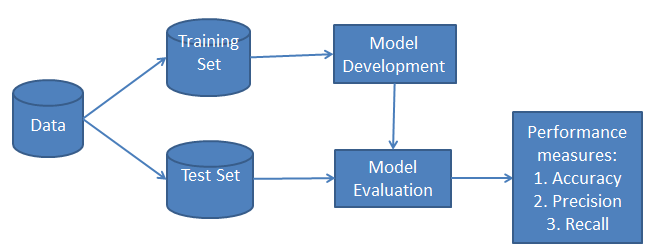
                     

In [93]:
from sklearn.model_selection import train_test_split

#If we use any integer value for random_state then it will produce the same result for an integer value.
#If we change the value of random_state, then only the result will be different.
#if we write none, it will produce different results in every execution.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Other important concepts**

**a. Confusion matrix**
A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model.
1. A good model is one which has high TP and TN rates, while low FP and FN rates.

**Understanding Confusion Matrix:**

The following 4 are the basic terminology which will help us in determining the metrics we are looking for.

    -True Positives (TP): when the actual value is Positive and predicted is also Positive.
    -True negatives (TN): when the actual value is Negative and prediction is also Negative.
    -False positives (FP): When the actual is negative but prediction is Positive. Also known as the Type 1 error
    -False negatives (FN): When the actual is Positive but the prediction is Negative. Also known as the Type 2 error

**b. Accuracy:**

Accuracy simply measures how often the classifier makes the correct prediction. It’s the ratio between the number of correct predictions and the total number of predictions.
\begin{equation}
Acc= \frac{TP+TN}{TP+TN+FP+FN} =\frac{\text{ correct prediction}}{\text{ total predictions}}
\end{equation}


**c. Precision:**

It is a measure of correctness that is achieved in true prediction. In simple words, it tells us how many predictions are actually positive out of all the total positive predicted.
\begin{equation}
Precision = \frac{TP}{TP+FP} = \frac{\text{prediction actually positive}}{\text{total predicted positive}}
\end{equation}

Precision is defined as the ratio of the total number of correctly classified positive classes divided by the total number of predicted positive classes

**d. Recall:**

It is a measure of actual observations which are predicted correctly, i.e. how many observations of positive class are actually predicted as positive. It is also known as Sensitivity. Recall is a valid choice of evaluation metric when we want to capture as many positives as possible.
\begin{equation}
Recall = \frac{TP}{TP+FN} =\frac{\text{prediction actually positive}}{\text{total actual positive}}
\end{equation}

**f. F-measure / F1-Score**

The F1 score is a number between 0 and 1 and is the harmonic mean of precision and recall. We use harmonic mean because it is not sensitive to extremely large values, unlike simple averages.
\begin{equation}
F1-score= \frac{\text{Recall*Precision}}{\text{Recall+Precision}}
\end{equation}

### Logistic Regression

`Logistic Regression is a Machine Learning algorithm which is used for the classification problems, it is a predictive analysis algorithm and based on the concept of probability.`

`We can call a Logistic Regression a Linear Regression model but the Logistic Regression uses a more complex cost function, this cost function can be defined as the ‘Sigmoid function’ or also known as the ‘logistic function’ instead of a linear function.`





#### Build and train the Model

In [200]:
# Building the model
# ==============================================================================
from sklearn.linear_model import LogisticRegression
modelLR = LogisticRegression(random_state= 1)


# Training the Model
# ==============================================================================
modelLR.fit(X_train, y_train)

# Making Predictions
# ==============================================================================
ypredLR = modelLR.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Evaluate the performance of the LR model

In [205]:
# Evaluating the metrics
# Importing metrics
# ==============================================================================
from sklearn import metrics
accLR = accuracy_score(y_test,ypredLR)
precisionLR = precision_score(y_test, ypredLR)
recallLR=  recall_score(y_test, ypredLR)
f1LR = f1_score(y_test,ypredLR)
print('Accuracy_LR : %.3f' %accLR)
print('Precision_LR : %.3f' %precisionLR)
print('Recall_LR : %.3f' %recallLR)
print('F1-score_LR : %.3f' %f1LR)

Accuracy_LR : 0.789
Precision_LR : 0.760
Recall_LR : 0.988
F1-score_LR : 0.859


#### Confusion Matrix for LR

<Axes: >

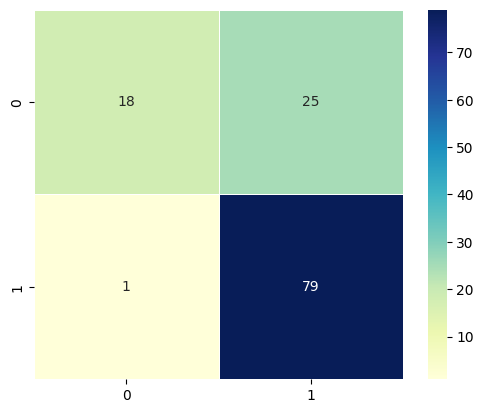

In [206]:
# Graph of Confusion Matrix
# ==============================================================================
cmLR = confusion_matrix(y_test, ypredLR)
sns.heatmap (cmLR, cmap="YlGnBu", annot = True, square=True, linewidths=.5)

In [ ]:
# Information of the model
# ==============================================================================
print("Intercept:", modelLR.intercept_)
print("Coefficient:", list(zip(X_train.columns, modelLR.coef_.flatten(),)))
print("Accuracy of trainin:", modelLR.score(X_train, y_train))

**Report**
\begin{equation}
\begin{split}
LoanStatus &= exp\Big(-0.112+0.231*Gender-0.495*Married+0.124* Dependents+0.332*Education\\&-0.252*SelfEmployed+ 0.129*ApplicantIncome+0.062*CoapplicantIncome\\&-0.672*LoanAmount+0.0003*LoanAmountTerm +3.258*CreditHistory+0.068PropertyArea\Big)\end{split}
\end{equation}


###  Naïve Bayes Classification

`In machine learning, Naïve Bayes classification is a straightforward and powerful algorithm for the classification task. Naïve Bayes classification is based on applying Bayes’ theorem with strong independence assumption between the features. Naïve Bayes classification produces good results when we use it for textual data analysis such as Natural Language Processing.`

#### Build and Train the model

In [94]:
# Building the Model
# ==============================================================================
from sklearn.naive_bayes import GaussianNB
modelNB= GaussianNB()

# Training the Model
# ==============================================================================
modelNB.fit(X_train, y_train)


# Making Predictions
# ==============================================================================
ypredNB = modelNB.predict(X_test)


#### Evaluate the Performance of our Naive Model

In [95]:
# Evaluating the metrics
# Importing metrics
# ==============================================================================
from sklearn import metrics
accNB = accuracy_score(y_test,ypredNB)
precisionNB = precision_score(y_test, ypredNB)
recallNB =  recall_score(y_test, ypredNB)
f1NB = f1_score(y_test,ypredNB)
print('Accuracy_Naive Bayes: %.3f' %accNB)
print('Precision_Naive Bayes: %.3f' %precisionNB)
print('Recall_Naive Bayes: %.3f' %recallNB)
print('F1-score_Naive Bayes : %.3f' %f1NB)

Accuracy_Naive Bayes: 0.780
Precision_Naive Bayes: 0.757
Recall_Naive Bayes: 0.975
F1-score_Naive Bayes : 0.852


#### Confusion Matrix for Naive


<Axes: >

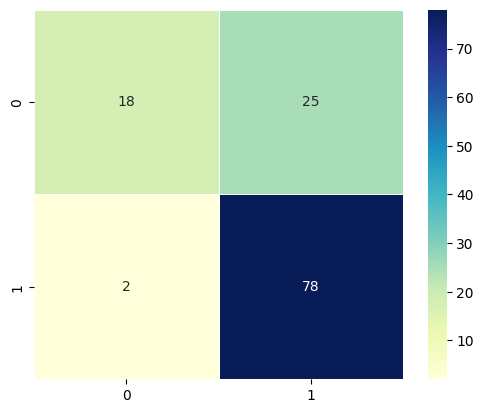

In [187]:
# Graph of Confusion Matrix
# ==============================================================================
cmNB = confusion_matrix(y_test, ypredNB)
sns.heatmap (cmNB, cmap="YlGnBu", annot = True, square=True, linewidths=.5)


#### **Check for overfitting and underfitting**

In [97]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gaussian.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gaussian.score(X_test, y_test)))

Training set score: 0.8126
Test set score: 0.7805


**Report**:

*    The training-set accuracy score is 0.8476 while the test-set accuracy to be 0.8126. These two values are quite comparable. So, there is no question of overfitting.

### K-Nearest Neighbour

`K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.`

`K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.`

`K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.`








#### Optimizing the Model

In [98]:
# Looking for the more optimized model, in order to reach that we will useTree using gridsearchCV
# ==============================================================================

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors': [2,4,6,8,10,12]}
gs = GridSearchCV(KNeighborsClassifier(), params, cv=10, n_jobs=-1, verbose=1)
gs.fit(X_train, y_train)

print('Score:',gs.best_score_,'\nParameters:', gs.best_params_)

best_classifier = gs.best_estimator_
best_classifier

Fitting 10 folds for each of 6 candidates, totalling 60 fits
Score: 0.7292244897959184 
Parameters: {'n_neighbors': 10}


KNeighborsClassifier(n_neighbors=10)

#### The Best Model: n_neighbors=10

In [99]:
# Building the Model
# ==============================================================================
modelKNN = KNeighborsClassifier(n_neighbors=10)


# Training the Model
# ==============================================================================
modelKNN.fit(X_train, y_train)


# Making Predictions
# ==============================================================================
ypredKNN = modelKNN.predict(X_test)


#### Evaluate the Performance of our KNN Model




In [100]:
# Evaluating the metrics
# Importing metrics
# ==============================================================================
from sklearn import metrics
accKNN= accuracy_score(y_test,ypredKNN)
precisionKNN=precision_score(y_test, ypredKNN)
recallKNN =  recall_score(y_test, ypredKNN)
f1KNN = f1_score(y_test,ypredKNN)
print('Accuracy_KNN: %.3f' %accKNN)
print('Precision_KNN: %.3f' %precisionKNN)
print('Recall_KNN: %.3f' %recallKNN)
print('F1-score_KNN : %.3f' %f1KNN)

Accuracy_KNN: 0.667
Precision_KNN: 0.682
Recall_KNN: 0.912
F1-score_KNN : 0.781


#### Confusion Matrix for  KNN

<Axes: >

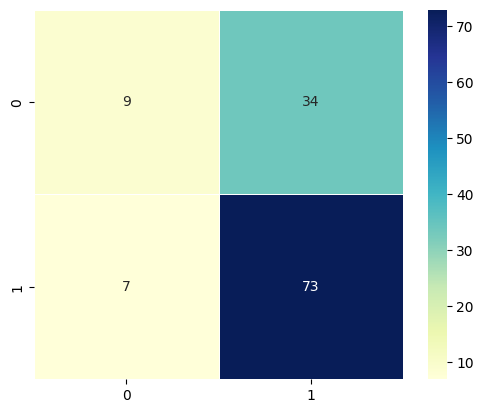

In [188]:
# Graph of Confusion Matrix
# ==============================================================================
cmKNN = confusion_matrix(y_test, ypredKNN)
sns.heatmap (cmKNN, cmap="YlGnBu", annot = True, square=True, linewidths=.5)

#### Checking Overfitting and Underfitting

In [102]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(modelKNN.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(modelKNN.score(X_test, y_test)))

Training set score: 0.7882
Test set score: 0.6667


###  Support Vector Machine

`Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However, it is mostly used in classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well`

`params = {'kernel': ['linear', 'poly', "RBF", "Sigmoid"], 'C': [10, 30, 50, 70, 80, 100], 'gamma': [1,0.1,0.01,0.001]}`

`C is the penalty parameter, which represents misclassification or error term. The misclassification or error term tells the SVM optimisation how much error is bearable. This is how you can control the trade-off between decision boundary and misclassification term.`

`Gamma: It defines how far influences the calculation of plausible line of separation.
when gamma is higher, nearby points will have high influence; low gamma means far away points also be considered to get the decision boundary.`



#### Optimizing the Model

In [114]:
#To optimize the model, we will find the best parameters for SVM using gridsearchCV
from sklearn.svm import  SVC
from sklearn.model_selection import GridSearchCV

params = {'kernel': ['linear', 'poly', 'rbf'], 'C':[10, 30, 50, 70, 80, 100]}
gs = GridSearchCV(SVC(), params, cv=10, n_jobs=-1, verbose=1)
gs.fit(X_train, y_train)

print('Score:',gs.best_score_,'\nParameters:', gs.best_params_)

best_classifier = gs.best_estimator_
best_classifier

Fitting 10 folds for each of 18 candidates, totalling 180 fits
Score: 0.8167755102040818 
Parameters: {'C': 50, 'kernel': 'linear'}


SVC(C=50, kernel='linear')

#### The Best Model : C=30 and Kernel="linear"

In [104]:
# Building the model
# ==============================================================================
from sklearn.svm import  SVC
modelSVM=SVC(C=30, kernel = "linear")


# Training the model
modelSVM.fit(X_train, y_train)


# Making Predictions
# ==============================================================================
ypredSVC = modelSVM.predict(X_test)


#### Evaluate the Performace of SVC model

In [105]:
# Evaluating the metrics
# Importing metrics
# ==============================================================================
from sklearn import metrics
accSVC= accuracy_score(y_test,ypredSVC)
precisionSVC=precision_score(y_test, ypredSVC)
recallSVC =  recall_score(y_test, ypredSVC)
f1SVC = f1_score(y_test,ypredSVC)
print('Accuracy_SVC: %.3f' %accSVC)
print('Precision_SVC: %.3f' %precisionSVC)
print('Recall_SVC: %.3f' %recallSVC)
print('F1-score_SVC : %.3f' %f1SVC)

Accuracy_SVC: 0.789
Precision_SVC: 0.760
Recall_SVC: 0.988
F1-score_SVC : 0.859


#### Confunsion Matrix for SVC

<Axes: >

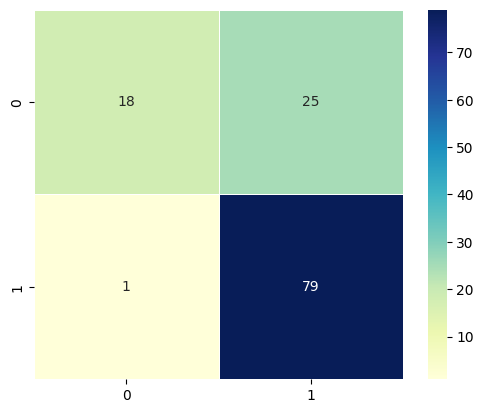

In [189]:
# Graph of Confusion Matrix
# ==============================================================================
cmSVC = confusion_matrix(y_test, ypredSVC)
sns.heatmap (cmSVC,cmap="YlGnBu", annot = True, square=True, linewidths=.5)

#### **Check overfitting and underfitting for SVM**

In [107]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(modelSVM.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(modelSVM.score(X_test, y_test)))

Training set score: 0.8147
Test set score: 0.7886


### Decision Tree Classification (DTC)

`A decision tree is a flowchart-like structure in which each internal node represents a test on a feature (e.g. whether a coin flip comes up heads or tails) , each leaf node represents a class label (decision taken after computing all features) and branches represent conjunctions of features that lead to those class labels. The paths from root to leaf represent classification rules.`

#### Optimizing the Model

In [108]:
# Looking for the more optimized model, in order to reach that we will useTree using gridsearchCV
# ==============================================================================
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {'criterion': ['entropy', 'gini'], 'max_depth': [5, 6, 7, 8, 9, 10], 'min_samples_leaf': [1,3, 4, 5, 7, 9]}
gs = GridSearchCV(DecisionTreeClassifier(), params, cv=10, n_jobs=-1, verbose=1)
gs.fit(X_train, y_train)

print('Score:',gs.best_score_,'\nParameters:', gs.best_params_)

best_classifier = gs.best_estimator_
best_classifier

Fitting 10 folds for each of 72 candidates, totalling 720 fits
Score: 0.8105714285714285 
Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4}


DecisionTreeClassifier(max_depth=5, min_samples_leaf=4)

#### The Best Model: criterion = "gini",  max_depth = 5, min_samples_leaf= 3

In [109]:
# Building the model
# ==============================================================================
from sklearn.tree import DecisionTreeClassifier
modelDTC = DecisionTreeClassifier(criterion = "gini", max_depth= 5, min_samples_leaf=3)


# Training the model
# ==============================================================================
modelDTC.fit(X_train,y_train)


#Making predictions
ypredDTC = modelDTC.predict(X_test)


#### Evaluate the performance of DTC model

In [110]:
# Evaluating the metrics
# Importing metrics
# ==============================================================================
from sklearn import metrics
accDTC = accuracy_score(y_test,ypredDTC)
precisionDTC = precision_score(y_test, ypredDTC)
recallDTC =  recall_score(y_test, ypredDTC)
f1DTC = f1_score(y_test,ypredDTC)
print('Accuracy_DTC: %.3f' %accDTC)
print('Precision_DTC: %.3f' %precisionDTC)
print('Recall_DTC: %.3f' %recallDTC)
print('F1-score_DTC : %.3f' %f1DTC)

Accuracy_DTC: 0.748
Precision_DTC: 0.753
Recall_DTC: 0.912
F1-score_DTC : 0.825


#### Matrix Confusion for Decision Tree

<Axes: >

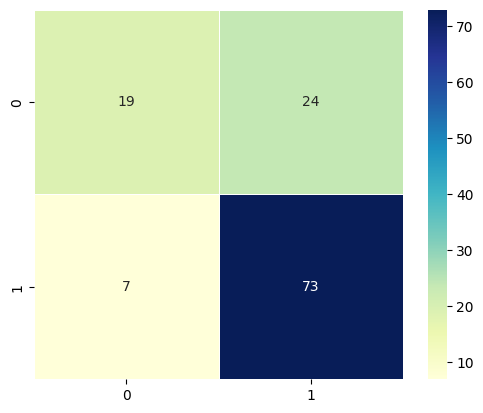

In [190]:
# Graph of confusion matrix
# ==============================================================================
cmDTC = confusion_matrix(y_test, ypredDTC)
sns.heatmap (cmDTC, cmap="YlGnBu", annot = True, square=True, linewidths=.5)

#### Drawing the Tree

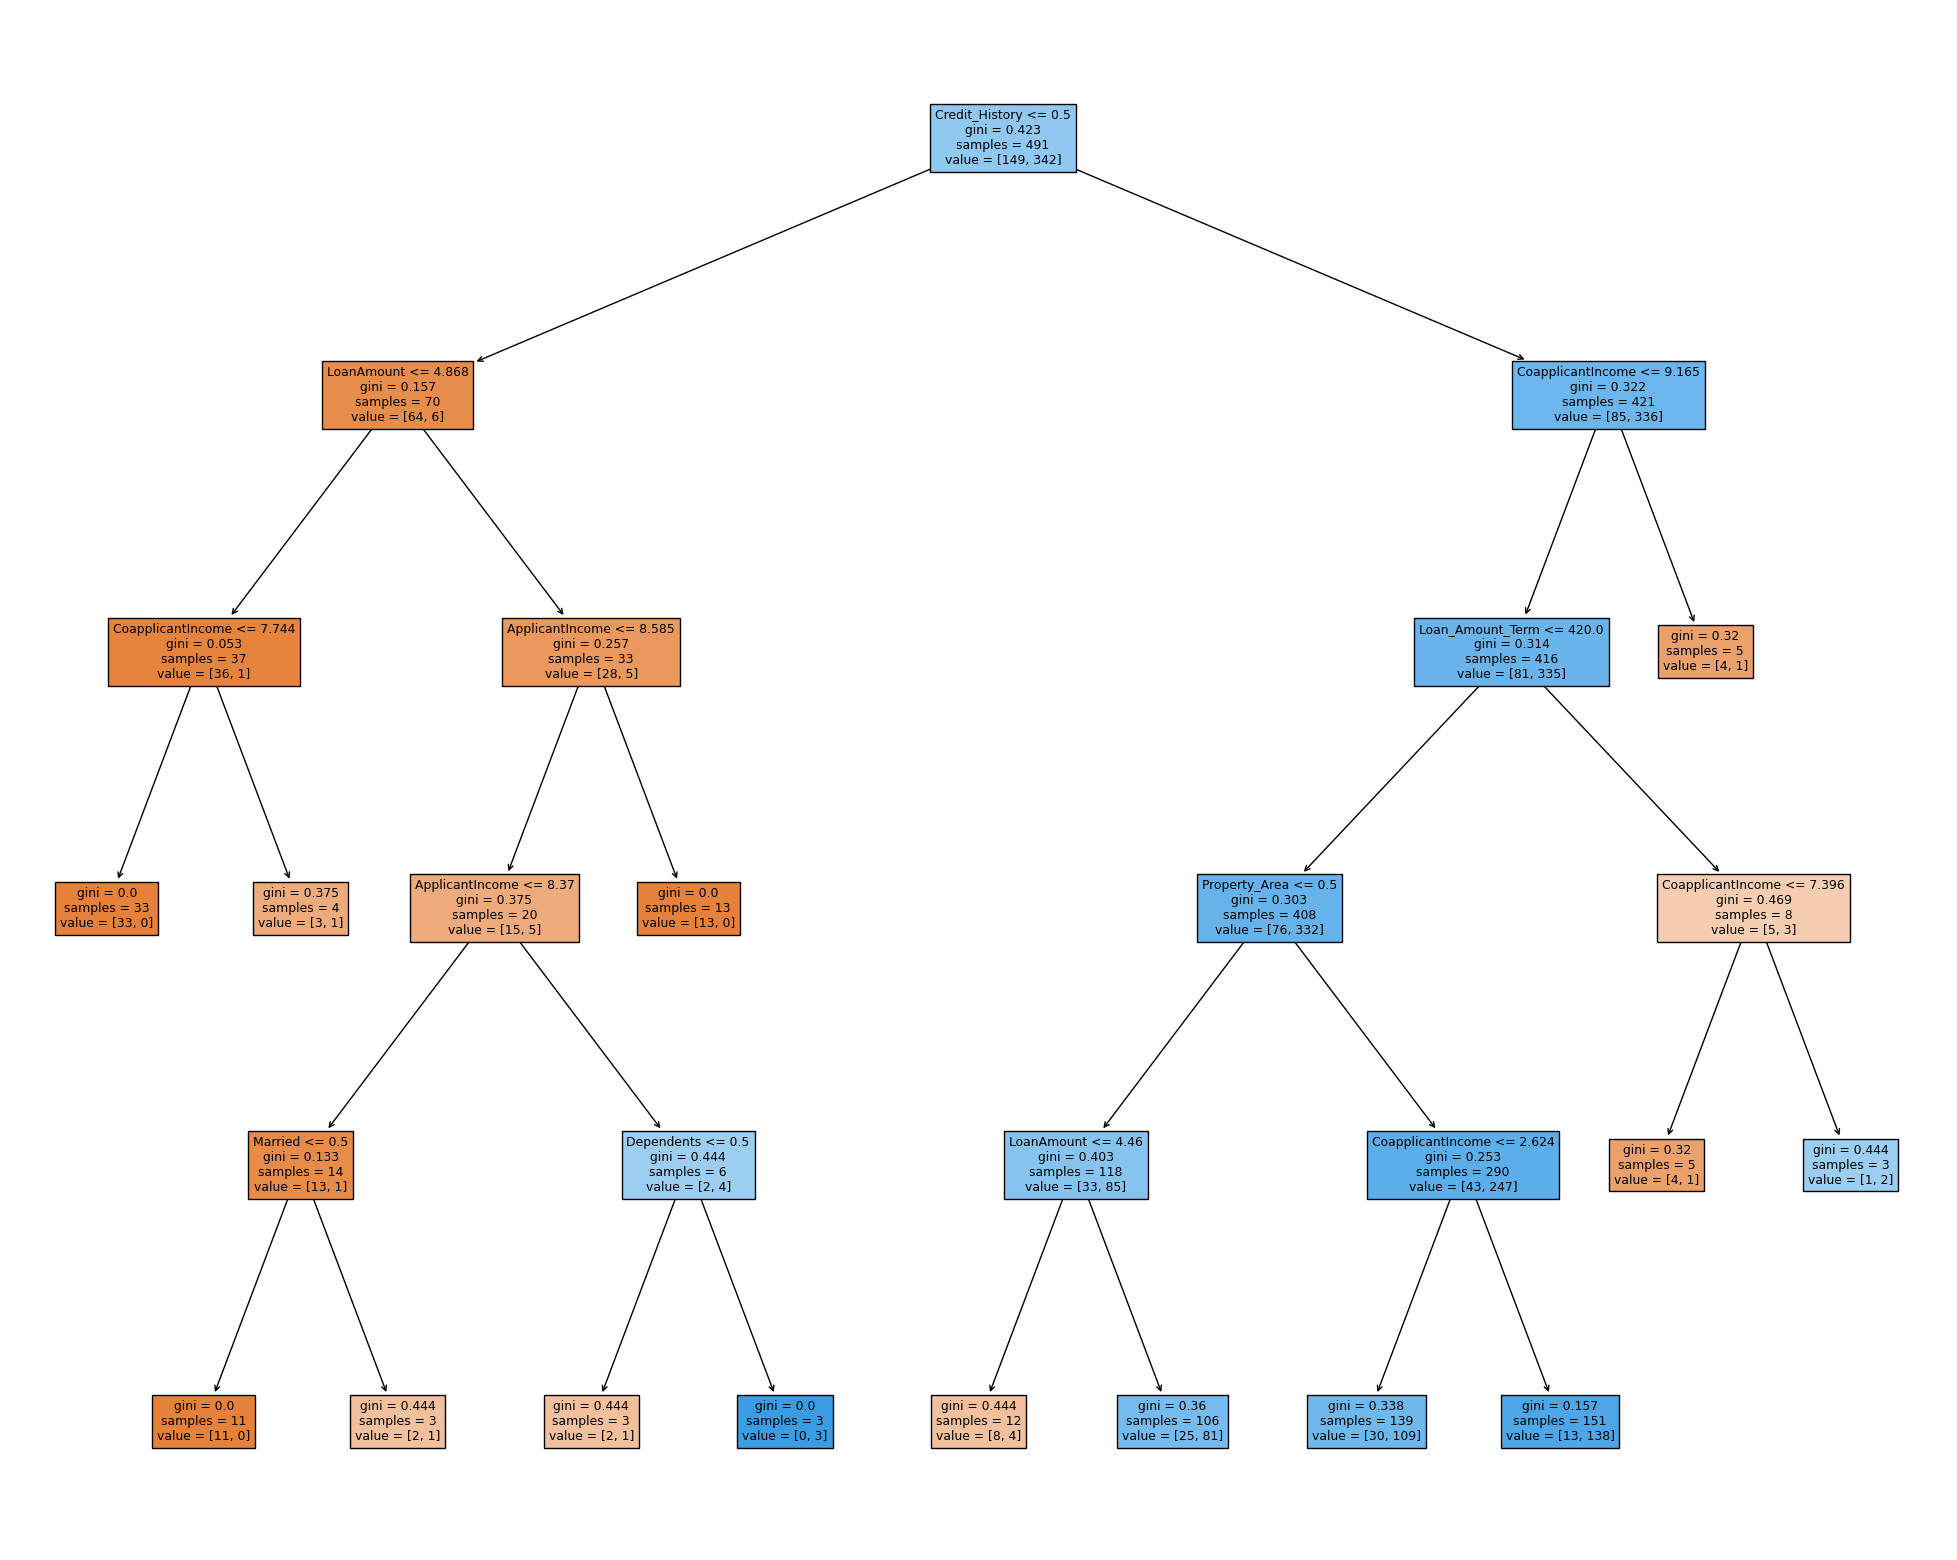

In [191]:
# Import library for drawing the tree
# ==============================================================================
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(modelDTC, feature_names=datatrain.columns, filled=True)
plt.show()

#### Checking Overfitting and Underfitting

In [113]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(modelDTC.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(modelDTC.score(X_test, y_test)))

Training set score: 0.8411
Test set score: 0.7480


### 4.1.6  Random Forest

`Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction.`

`A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.`

# 8. Results and Conclusions

The aim of this project was predict the type of specie of penguins from their  main characteristics, in order to do that we have used 4 models of classification:  Naive Bayes, K-Nearnest Neighbor, Support Vector Machine and Decision Tree. The report of each of them is as follow


* Naive Bayes Clasification has an accuracy of 0.896.
* K-Nearest Neighbour has an accuracy of  0.98, where its parameters is  k_neighbour=4
* Support Vector Machine has an accuracy  of 1, where the best parameter are C= 30 and kernel = Linear, these parameters were found using gridsearchCV.
* Decision Tree Classifier has an accuracy  of 0.985, where the best parameter are criterion = "gini", max_depth= 9, min_samples_leaf=1, these parameters were found using gridsearchCV.
* The model that predicts better is Support Vector Machine Classifier.


# 6.  References

https://scikit-learn.org/0.21/_downloads/scikit-learn-docs.pdf